<a href="https://colab.research.google.com/github/galhev/Graph-Classification/blob/master/Graph_Classification_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Graph Classification Challenge

By: Gal Hever

In this challenge you'll be classifying graphs, which is the basis for the work we do at Intelici.

This is a binary classification challenge with 992 graphs in the training set, and 121 in the test set. In order to extract graph features, you may use all algorithms and functions that networkx (or any other library) provides you, or write your own.

We don't have the ground truth for this data. Instead, four annotators with different skill levels tagged the data, so you'll need to find a way to obtain labels to use for training.

The purpose of this challenge is to see how you work. Writing clean and orderly code and demonstrating understanding is more important than receiving perfect results.

# Layout
- graphs/ contains 1113 graph files in edge list format
- classes_train.csv contains 5 columns: Graph filename, Annotator 1, Annotator 2, Annotator 3, Annotator 4
- classes_test.csv contains 2 columns: Graph filenae, class

### Import Data

In [0]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

#### If you need to prepare the data  use the next steps

##### Uplaod graph files

In [0]:
from google.colab import files
uploaded = files.upload()

Saving 1 to 1
Saving 2 to 2
Saving 3 to 3
Saving 4 to 4
Saving 5 to 5
Saving 6 to 6
Saving 7 to 7
Saving 8 to 8
Saving 9 to 9
Saving 10 to 10
Saving 11 to 11
Saving 12 to 12
Saving 13 to 13
Saving 14 to 14
Saving 15 to 15
Saving 16 to 16
Saving 17 to 17
Saving 18 to 18
Saving 19 to 19
Saving 20 to 20
Saving 21 to 21
Saving 22 to 22
Saving 23 to 23
Saving 24 to 24
Saving 25 to 25
Saving 26 to 26
Saving 27 to 27
Saving 28 to 28
Saving 29 to 29
Saving 30 to 30
Saving 31 to 31
Saving 32 to 32
Saving 33 to 33
Saving 34 to 34
Saving 35 to 35
Saving 36 to 36
Saving 37 to 37
Saving 38 to 38
Saving 39 to 39
Saving 40 to 40
Saving 41 to 41
Saving 42 to 42
Saving 43 to 43
Saving 44 to 44
Saving 45 to 45
Saving 46 to 46
Saving 47 to 47
Saving 48 to 48
Saving 49 to 49
Saving 50 to 50
Saving 51 to 51
Saving 52 to 52
Saving 53 to 53
Saving 54 to 54
Saving 55 to 55
Saving 56 to 56
Saving 57 to 57
Saving 58 to 58
Saving 59 to 59
Saving 60 to 60
Saving 61 to 61
Saving 62 to 62
Saving 63 to 63
Saving 64 

In [0]:
# remove files
# !rm '1 (1)'

In [0]:
import os
n_files=len([uploaded for uploaded in os.listdir('.') if (os.path.isfile(uploaded))])

In [0]:
df = pd.DataFrame(index=range(1,n_files+1),columns=['edges','nodes','avg_edg','avg_deg','med_edg','med_deg','IQR_edg','IQR_deg','STD_edg','STD_deg', 'Total_edg','Total_deg','is_connected','avg_length','radius','diameter','eccentricity','center','periphery','density','n.connected.comp','n.of_isolates','is_distance_regular','is_eulerian', 'label'])

In [0]:
from operator import itemgetter 
def get_edg(i):
  edg=list(map(itemgetter(i), G.edges()))
  count_vals=list(pd.Index(edg).value_counts())
  return count_vals

#### Feature preparation

In [0]:
for filename in range(1,n_files+1):
  if(type(filename)==int):
    G=nx.read_adjlist(str(filename), nodetype=int)
    deg=list(dict(G.degree()).values())
    edg=get_edg(0)
    df.xs(filename)['edges']=G.size() #The number of edges
    df.xs(filename)['nodes']=len(G)#Total amount of nodes
    df.xs(filename)['avg_edg']= np.mean(edg)#Average connections for each node
    df.xs(filename)['avg_deg']= np.mean(deg)#Average degree for each node
    df.xs(filename)['med_edg']= np.median(edg)#Median connections for each node
    df.xs(filename)['med_deg']= np.median(deg)#Median degree for each node
    df.xs(filename)['IQR_edg']= np.subtract(*np.percentile(edg, [75, 25]))#IQR connections for each node
    df.xs(filename)['IQR_deg']= np.subtract(*np.percentile(deg, [75, 25]))#IQR degree
    df.xs(filename)['STD_edg']= np.std(edg)#STD connections for each node
    df.xs(filename)['STD_deg']= np.std(deg)#STD degree
    df.xs(filename)['Total_edg']= np.sum(edg)#Total sum of connections
    df.xs(filename)['Total_deg']= np.sum(deg)#Total sum of degrees
    df.xs(filename)['is_connected']= nx.is_connected(G)
    if(nx.is_connected(G)):
      df.xs(filename)['avg_length']= nx.average_shortest_path_length(G)
      df.xs(filename)['radius']= nx.radius(G)
      df.xs(filename)['diameter']= nx.diameter(G)
      ecc= nx.eccentricity(G) # The eccentricity of a node v is the maximum distance from v to all other nodes in G
      df.xs(filename)['eccentricity']= sum(ecc.values()) # sum the eccentricity
      df.xs(filename)['center']= len(nx.center(G)) # The center is the set of nodes with eccentricity equal to radius.
      df.xs(filename)['periphery']= len(nx.periphery(G))# The periphery is the set of nodes with eccentricity equal to the diameter.
    else:
      sum_avg_short= 0
      diameter= 0
      radius= 0
      ecc_sum= 0
      len_center= 0
      len_periphery= 0      
      for g in nx.connected_component_subgraphs(G):
        sum_avg_short+= nx.average_shortest_path_length(g)  
        radius+= nx.radius(g)
        diameter+= nx.diameter(g)           
        ecc= nx.eccentricity(g) # The eccentricity of a node v is the maximum distance from v to all other nodes in G
        ecc_sum+= sum(ecc.values())
        center=nx.center(g)
        len_center+=len(nx.center(g))
        len_periphery+=len(nx.periphery(g))
      df.xs(filename)['avg_length']= sum_avg_short/nx.number_connected_components(G)
      df.xs(filename)['radius']= radius/nx.number_connected_components(G)
      df.xs(filename)['diameter']= diameter/nx.number_connected_components(G)     
      df.xs(filename)['eccentricity']= ecc_sum/nx.number_connected_components(G) # sum the eccentricity
      df.xs(filename)['center']= len_center/nx.number_connected_components(G) # The center is the set of nodes with eccentricity equal to radius.
      df.xs(filename)['periphery']= len_periphery/nx.number_connected_components(G)# The periphery is the set of nodes with eccentricity equal to the diameter.     
    df.xs(filename)['density']= nx.density(G)
    df.xs(filename)['n.connected.comp']= nx.number_connected_components(G)# How many groups
    df.xs(filename)['n.of_isolates']= nx.number_of_isolates(G)# Returns the number of isolates in the graph.
    df.xs(filename)['is_distance_regular']= nx.is_distance_regular(G)
    df.xs(filename)['is_eulerian']= nx.is_eulerian(G)

In [0]:
# Download file
df.to_csv('data.csv')
files.download('data.csv')

#### If you already prepared the data start here

##### Uplaod data and labels files

In [0]:
uploaded = files.upload()

Saving labels_test.csv to labels_test (4).csv
Saving labels_train.csv to labels_train (4).csv


In [0]:
# Uplaod data file
df=pd.read_csv('data.csv')
df = pd.DataFrame(df)


In [0]:
df=df.rename(index=str, columns={"Unnamed: 0": "index"})

In [0]:
df=df.set_index(['index'])

In [0]:
data=df.copy()

In [0]:
import io
labels_train = pd.read_csv(io.BytesIO(uploaded['labels_train.csv']), names=['graph','label1','label2', 'label3', 'label4'])
labels_test = pd.read_csv(io.BytesIO(uploaded['labels_test.csv']), names=['graph','label'])

In [0]:
def get_labels(df, csv):
  for i in range(0,len(csv)):
    row=csv.loc[i,'graph']
    df.loc[df.index==row,'label']=csv.loc[i,'label']
  return df

#### Training Labels Completion

In [0]:
labels_train['label']=labels_train.apply(lambda x: 1 if np.mean(x[1:5])>0.5 else(0 if np.mean(x[1:5])<0.5 else np.nan), axis=1)

In [0]:
df = get_labels(df, labels_test)
df = get_labels(df, labels_train)

In [0]:
cols=list(df.columns)
cols.remove('label')

In [0]:
# Change label type
for col in cols:
    df[col] = df[col].astype('float')

#### KNN Imputer 

In [0]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(3, weights='distance')
not_null_x=df[~df.isnull().any(axis=1)].drop('label', axis=1)
not_null_y=df.loc[~df.isnull().any(axis=1),'label']
not_null_y=not_null_y.astype('float')
trained_model = clf.fit(not_null_x, not_null_y)

In [0]:
predicted_labels = trained_model.predict(df[df.isnull().any(axis=1)].drop('label', axis=1))

In [0]:
df.loc[df.isnull().any(axis=1),'label']=predicted_labels

In [0]:
df['label'] = df['label'].astype('float')

### Exploratory Data Analysis (EDA)


In order to understand the data, it is common to begin with descriptive statistics analysis before the pre-processing section and model building

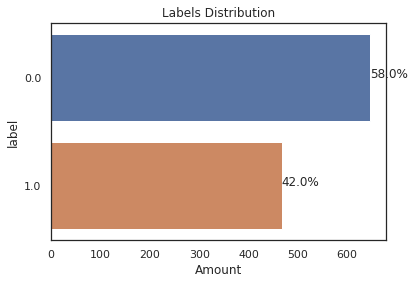

In [0]:
ax = sns.countplot(y="label", data=df)
plt.title('Labels Distribution')
plt.xlabel('Amount')

total = len(df['label'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

In [0]:
df.shape

(1113, 25)

In [0]:
# Check features datatypes
types = df.dtypes
pd.DataFrame(types)

,0
edges,float64
nodes,float64
avg_edg,float64
avg_deg,float64
med_edg,float64
med_deg,float64
IQR_edg,float64
IQR_deg,float64
STD_edg,float64
STD_deg,float64


In [0]:
df.columns

Index(['edges', 'nodes', 'avg_edg', 'avg_deg', 'med_edg', 'med_deg', 'IQR_edg',
       'IQR_deg', 'STD_edg', 'STD_deg', 'Total_edg', 'Total_deg',
       'is_connected', 'avg_length', 'radius', 'diameter', 'eccentricity',
       'center', 'periphery', 'density', 'n.connected.comp', 'n.of_isolates',
       'is_distance_regular', 'is_eulerian', 'label'],
      dtype='object')

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1113 entries, 1 to 1113
Data columns (total 25 columns):
edges                  1113 non-null float64
nodes                  1113 non-null float64
avg_edg                1113 non-null float64
avg_deg                1113 non-null float64
med_edg                1113 non-null float64
med_deg                1113 non-null float64
IQR_edg                1113 non-null float64
IQR_deg                1113 non-null float64
STD_edg                1113 non-null float64
STD_deg                1113 non-null float64
Total_edg              1113 non-null float64
Total_deg              1113 non-null float64
is_connected           1113 non-null float64
avg_length             1113 non-null float64
radius                 1113 non-null float64
diameter               1113 non-null float64
eccentricity           1113 non-null float64
center                 1113 non-null float64
periphery              1113 non-null float64
density                1113 non-null f

In [0]:
df.isnull().sum()

edges                  0
nodes                  0
avg_edg                0
avg_deg                0
med_edg                0
med_deg                0
IQR_edg                0
IQR_deg                0
STD_edg                0
STD_deg                0
Total_edg              0
Total_deg              0
is_connected           0
avg_length             0
radius                 0
diameter               0
eccentricity           0
center                 0
periphery              0
density                0
n.connected.comp       0
n.of_isolates          0
is_distance_regular    0
is_eulerian            0
label                  0
dtype: int64

In [0]:
df.nunique()

edges                  223
nodes                  148
avg_edg                459
avg_deg                457
med_edg                  5
med_deg                  8
IQR_edg                 13
IQR_deg                 13
STD_edg                850
STD_deg                758
Total_edg              223
Total_deg              223
is_connected             2
avg_length             945
radius                  35
diameter                59
eccentricity           617
center                  25
periphery               31
density                642
n.connected.comp         7
n.of_isolates            1
is_distance_regular      2
is_eulerian              2
label                    2
dtype: int64

In [0]:
df=df.drop('n.of_isolates',axis=1)

In [0]:
df.head()

,edges,nodes,avg_edg,avg_deg,med_edg,med_deg,IQR_edg,IQR_deg,STD_edg,STD_deg,Total_edg,Total_deg,is_connected,avg_length,radius,diameter,eccentricity,center,periphery,density,n.connected.comp,is_distance_regular,is_eulerian,label
index,,,,,,,,,,,,,,,,,,,,,,,,
1,81.0,42.0,2.314286,3.857143,2.0,3.0,2.00,1.00,1.304310,1.166424,81.0,162.0,1.0,5.364692,7.0,14.0,455.0,1.0,3.0,0.094077,1.0,0.0,0.0,0.0
2,46.0,27.0,1.769231,3.407407,2.0,3.0,1.00,1.00,0.638971,0.561694,46.0,92.0,1.0,5.945869,8.0,15.0,319.0,2.0,5.0,0.131054,1.0,0.0,0.0,0.0
3,17.0,10.0,2.125000,3.400000,2.0,3.0,0.25,0.75,0.599479,0.663325,17.0,34.0,1.0,2.222222,2.0,4.0,35.0,1.0,6.0,0.377778,1.0,0.0,0.0,1.0
4,46.0,24.0,2.190476,3.833333,2.0,3.5,1.00,1.00,0.851835,1.280191,46.0,92.0,1.0,2.956522,3.0,6.0,121.0,1.0,9.0,0.166667,1.0,0.0,0.0,0.0
5,21.0,11.0,2.100000,3.818182,2.5,3.0,2.00,2.00,0.943398,0.935966,21.0,42.0,1.0,2.072727,2.0,4.0,37.0,1.0,5.0,0.381818,1.0,0.0,0.0,0.0


In [0]:
def describe(df):
    return pd.concat([df.describe().T,
                      df.mad().rename('mad'),
                      df.skew().rename('skew'),
                      df.kurt().rename('kurt'),
                     ], axis=1).T

# Descriptive statistics
describe(df)

,edges,nodes,avg_edg,avg_deg,med_edg,med_deg,IQR_edg,IQR_deg,STD_edg,STD_deg,Total_edg,Total_deg,is_connected,avg_length,radius,diameter,eccentricity,center,periphery,density,n.connected.comp,is_distance_regular,is_eulerian,label
count,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000
mean,72.815813,39.053010,2.178140,3.734917,2.033243,3.581761,1.297844,1.185085,1.000944,0.878793,72.815813,145.631626,0.962264,4.670772,6.038310,11.497953,522.335580,2.795573,5.281409,0.212197,1.073675,0.010782,0.001797,0.419587
std,84.637076,45.775943,0.233386,0.423575,0.260171,0.600554,0.566916,0.511884,0.228987,0.264356,84.637076,169.274151,0.190642,2.723055,3.946233,7.856541,1279.849493,1.869562,2.029344,0.198070,0.512399,0.103320,0.042371,0.493713
min,5.000000,4.000000,1.473684,1.714286,1.000000,1.000000,0.000000,0.000000,0.471405,0.000000,5.000000,10.000000,0.000000,1.000000,1.000000,1.000000,4.000000,1.000000,2.000000,0.005467,1.000000,0.000000,0.000000,0.000000
25%,28.000000,15.000000,2.000000,3.478261,2.000000,3.000000,1.000000,1.000000,0.840992,0.704004,28.000000,56.000000,1.000000,2.709069,3.000000,6.000000,74.000000,1.000000,4.000000,0.087347,1.000000,0.000000,0.000000,0.000000
50%,49.000000,26.000000,2.177778,3.677419,2.000000,4.000000,1.000000,1.000000,0.991085,0.871780,49.000000,98.000000,1.000000,4.191176,5.000000,10.000000,202.000000,2.000000,5.000000,0.148551,1.000000,0.000000,0.000000,0.000000
75%,87.000000,45.000000,2.333333,4.000000,2.000000,4.000000,2.000000,1.500000,1.126099,1.027402,87.000000,174.000000,1.000000,5.941224,8.000000,15.000000,484.000000,4.000000,6.000000,0.257143,1.000000,0.000000,0.000000,1.000000
max,1049.000000,620.000000,3.000000,5.071429,3.000000,5.000000,3.000000,3.000000,2.801268,2.610357,1049.000000,2098.000000,1.000000,23.331429,32.000000,64.000000,30492.000000,16.000000,18.000000,1.000000,9.000000,1.000000,1.000000,1.000000
mad,49.402454,26.514456,0.188747,0.324284,0.108249,0.536123,0.482005,0.383706,0.172919,0.200408,49.402454,98.804907,0.072624,2.061468,2.966729,5.938128,538.214780,1.357915,1.411469,0.139489,0.141789,0.021331,0.003587,0.487067
skew,5.241192,5.227466,0.230037,-0.016643,0.931171,-0.036317,0.088554,0.547421,1.160233,0.438370,5.241192,5.241192,-4.858273,1.410281,1.401842,1.431886,13.596246,2.156700,1.724732,2.012729,10.520455,9.487013,23.558381,0.326335


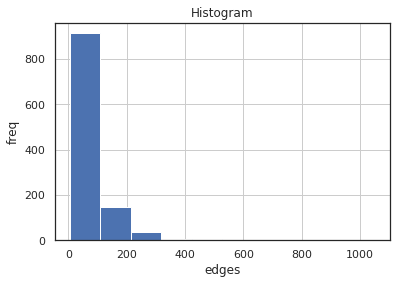

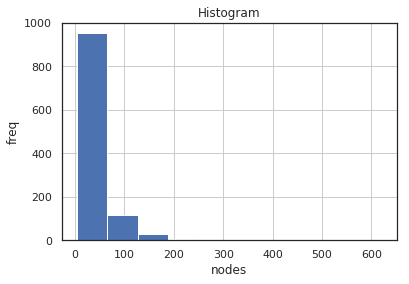

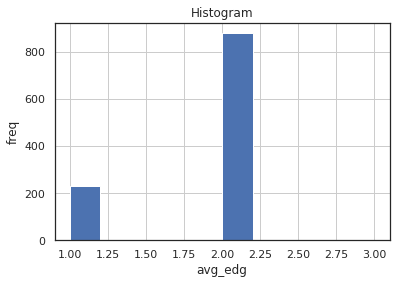

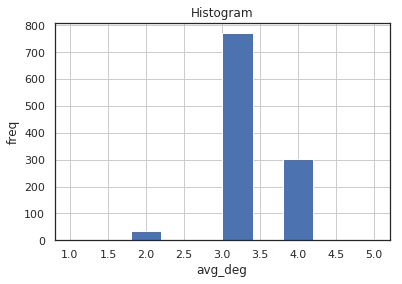

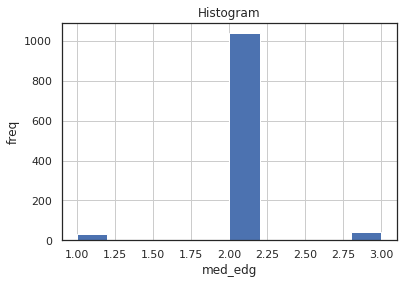

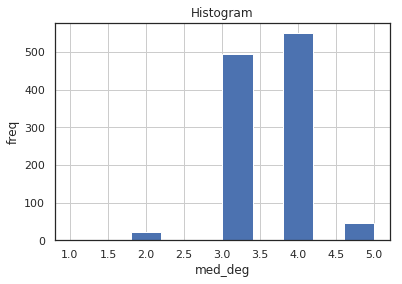

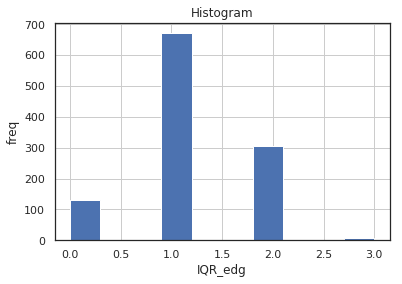

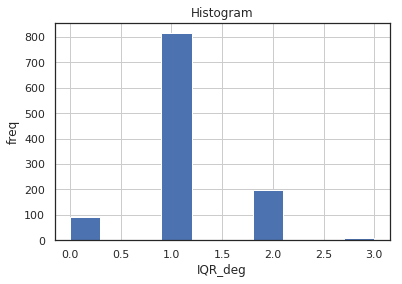

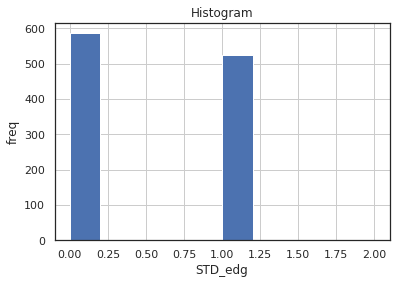

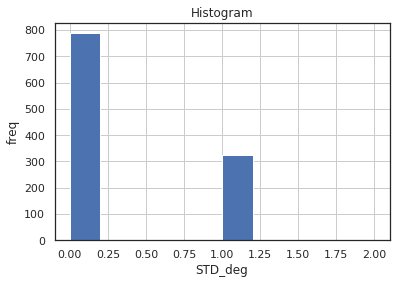

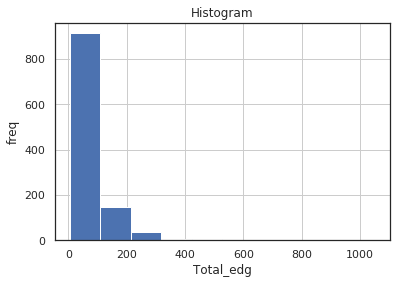

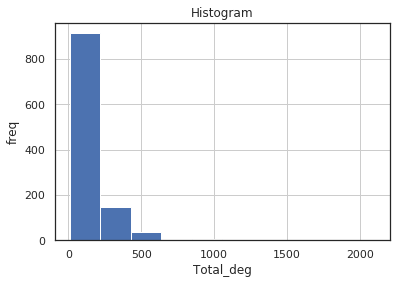

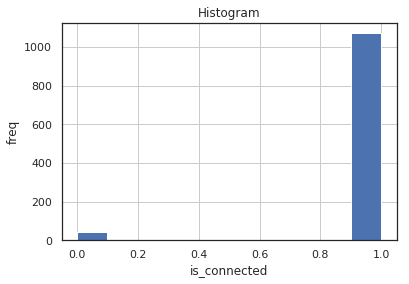

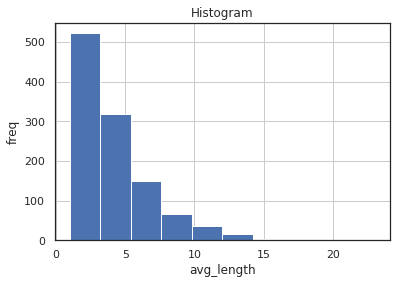

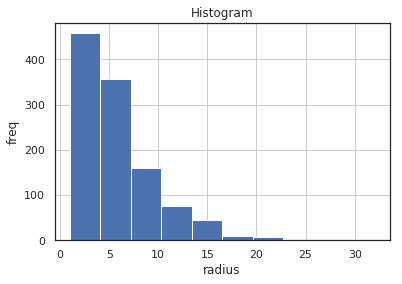

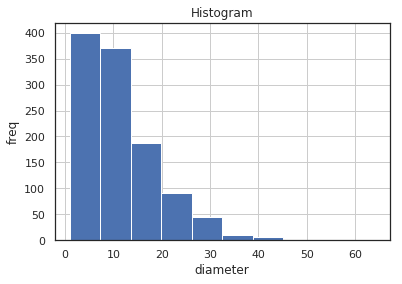

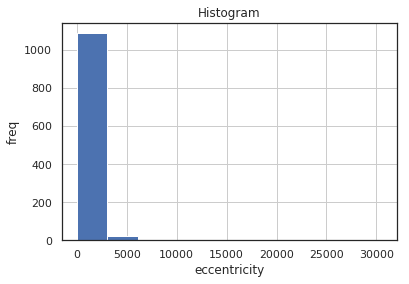

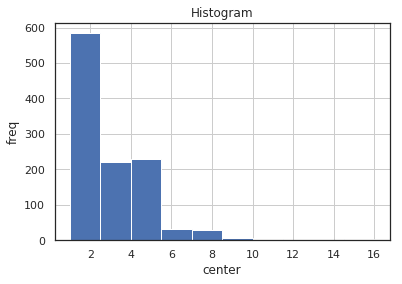

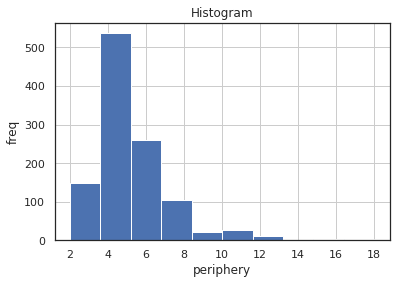

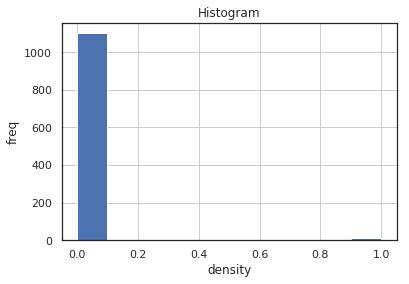

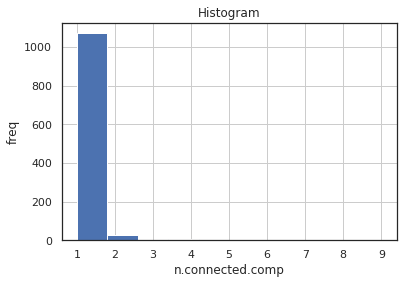

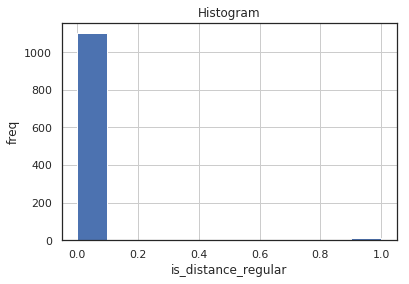

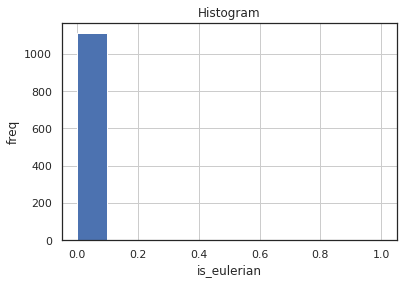

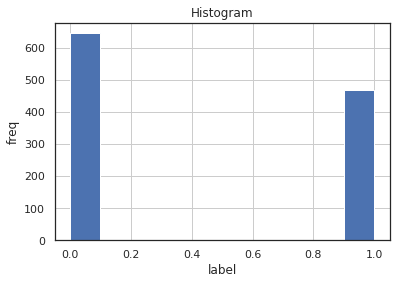

In [0]:
for col in df.columns:
    col_data = df[col]
    plt.hist(col_data)
    plt.xlabel(col)
    plt.ylabel('freq')
    plt.title('Histogram')
    plt.grid(True)
    plt.show()

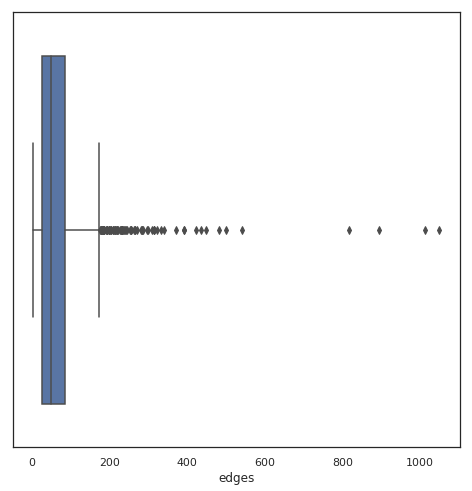

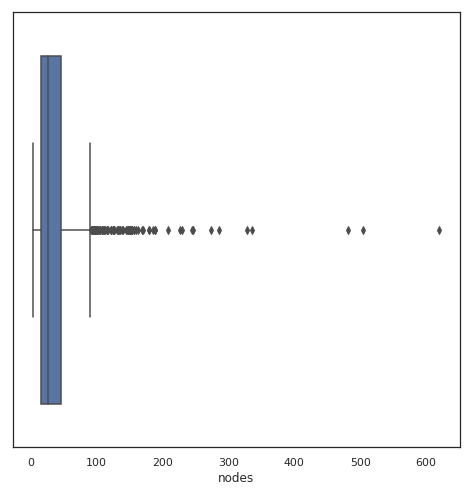

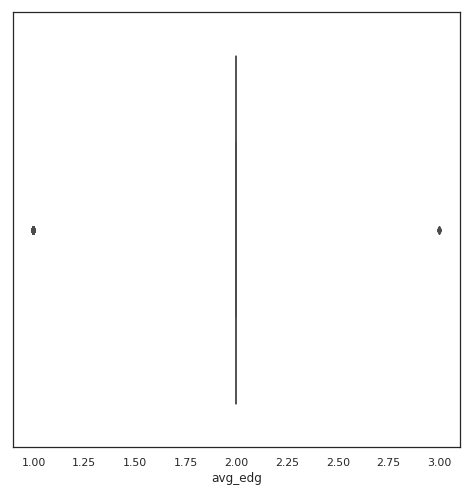

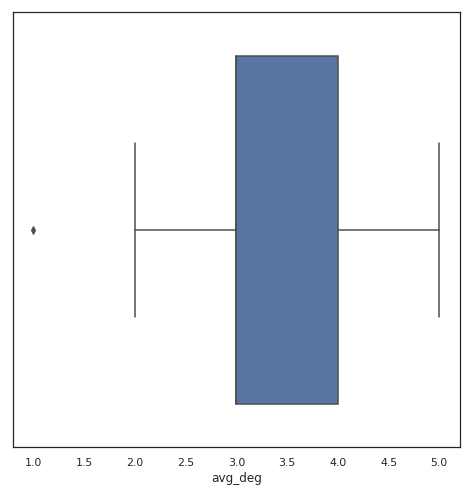

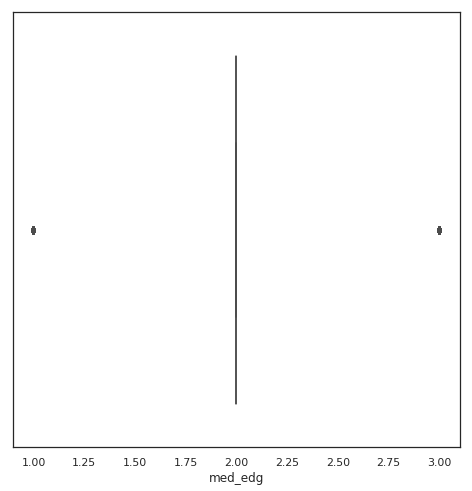

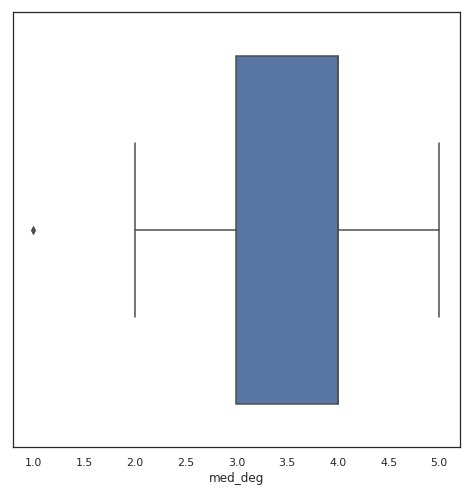

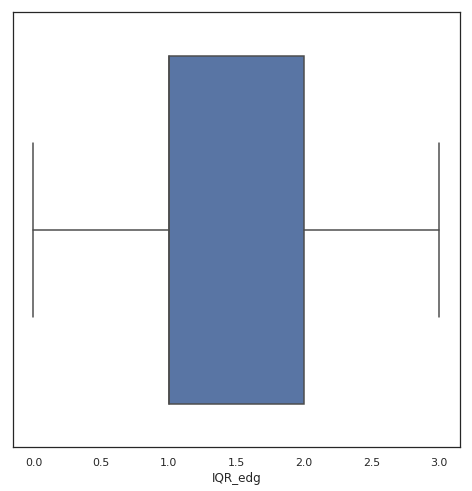

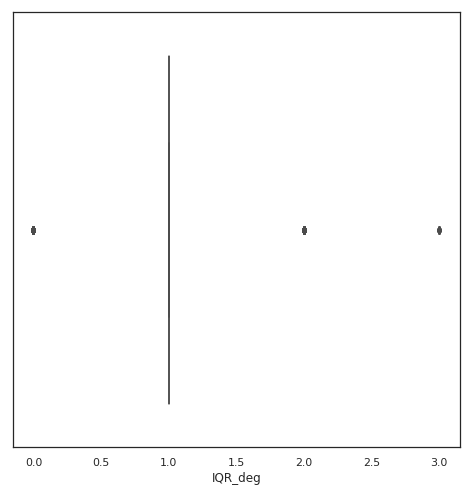

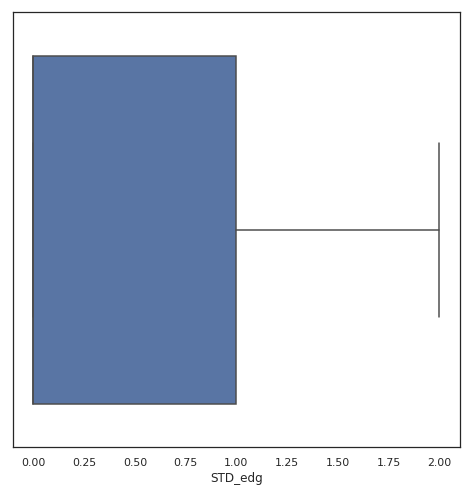

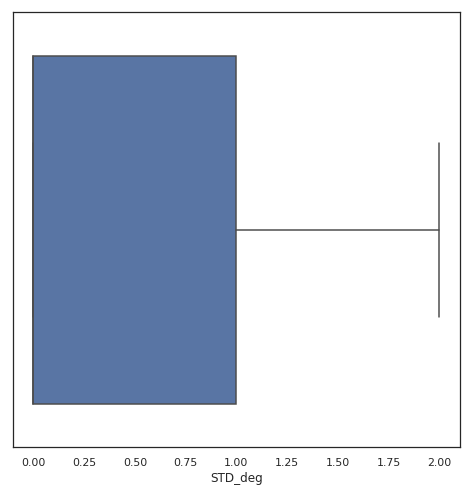

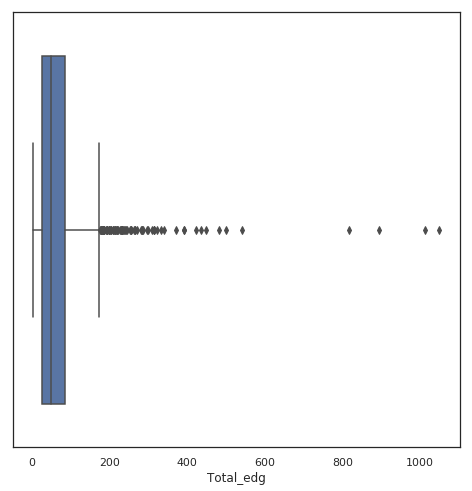

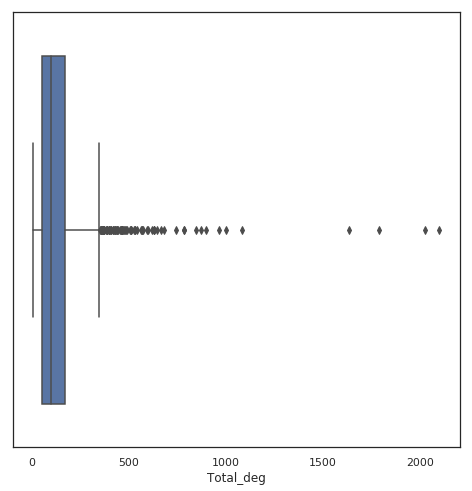

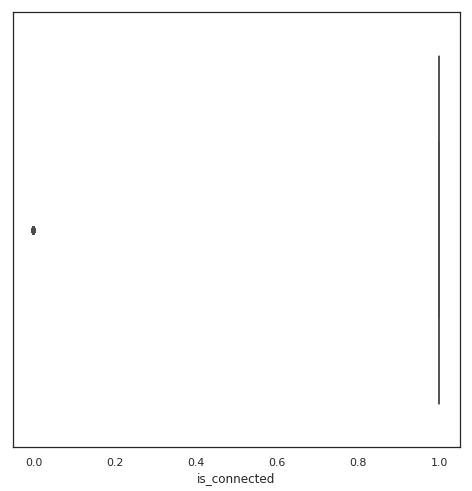

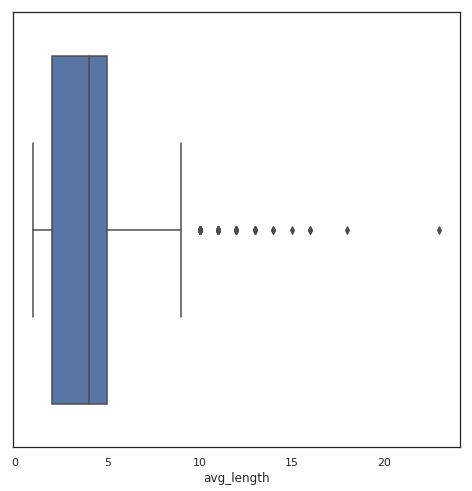

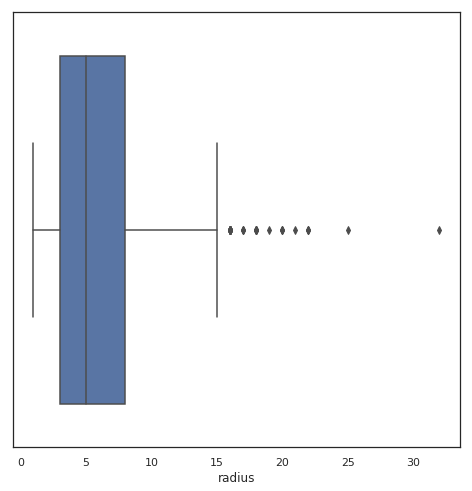

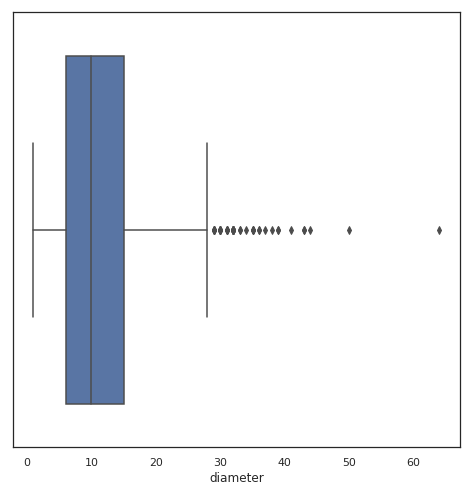

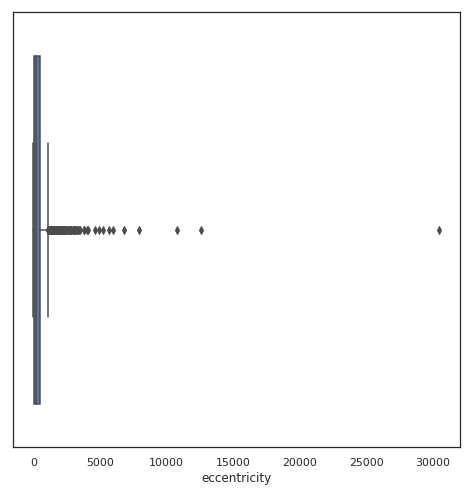

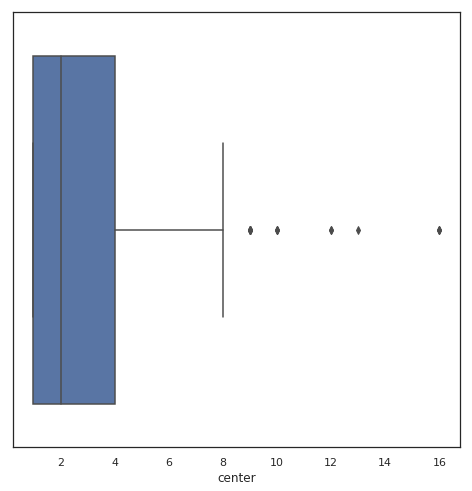

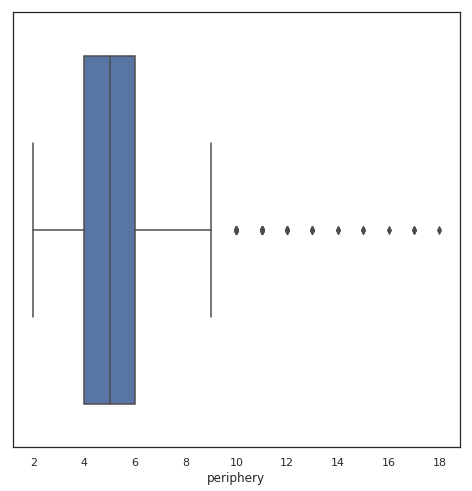

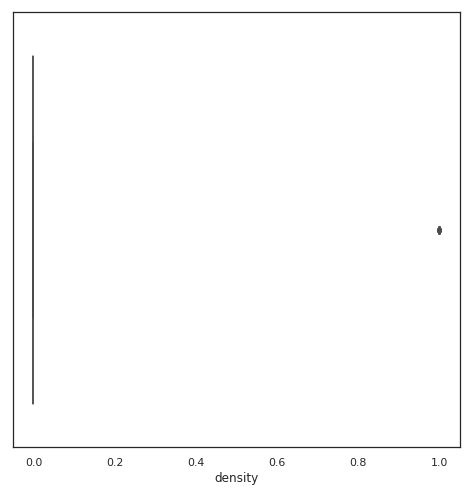

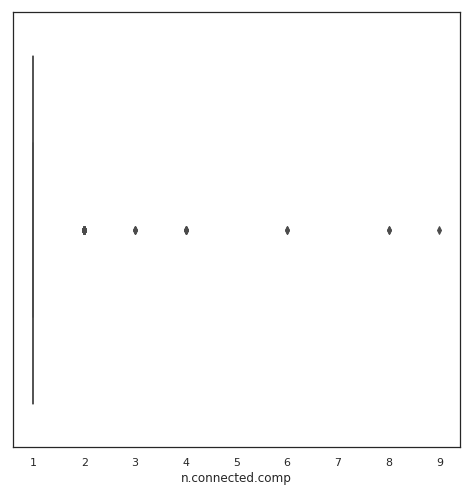

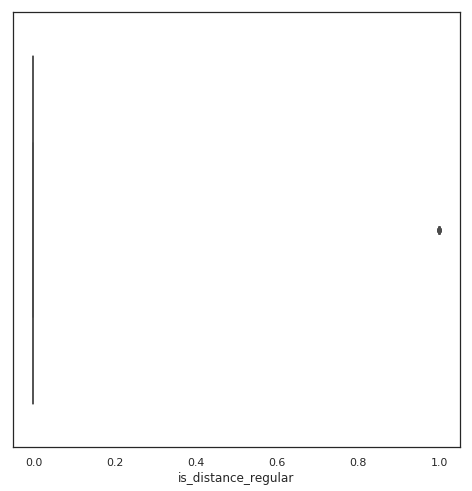

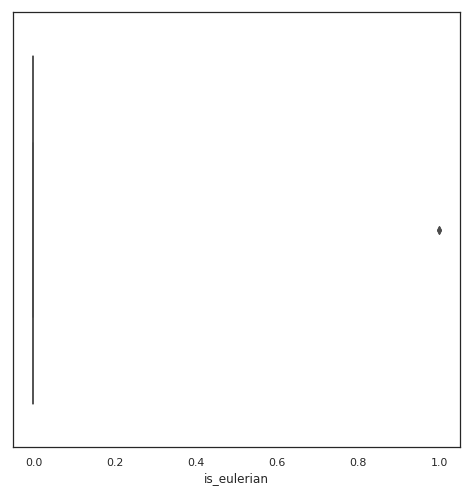

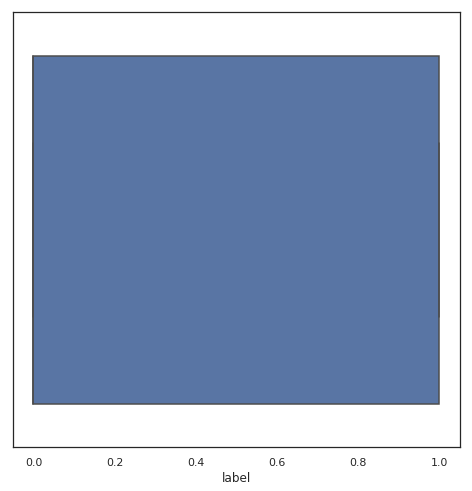

In [0]:
# Boxplot
for col in df.columns:
    sns.boxplot(df[col])
    plt.xlabel(col)
    fig=plt.gcf()
    fig.set_size_inches(8,8)
    plt.show()

### Multicollinearity

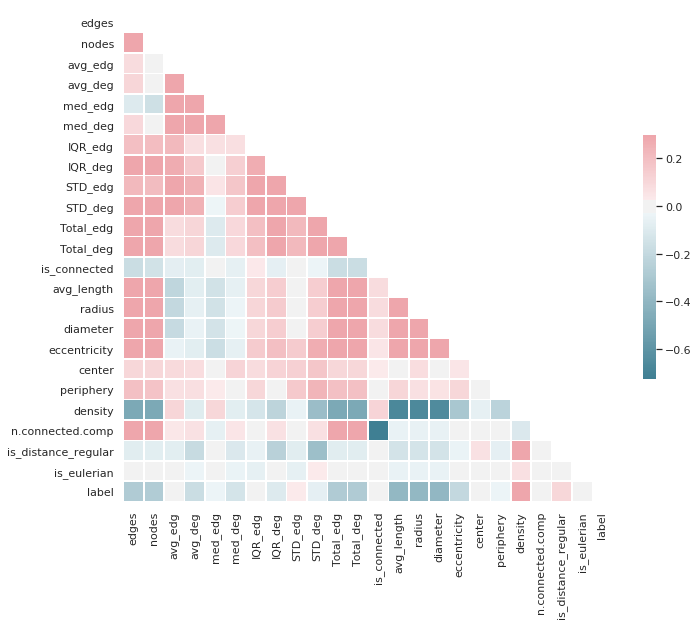

In [0]:
# Compute the correlation matrix
sns.set(style="white")

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [0]:
df.corr()

,edges,nodes,avg_edg,avg_deg,med_edg,med_deg,IQR_edg,IQR_deg,STD_edg,STD_deg,Total_edg,Total_deg,is_connected,avg_length,radius,diameter,eccentricity,center,periphery,density,n.connected.comp,is_distance_regular,is_eulerian,label
edges,1.000000,0.984553,0.086212,0.107622,-0.094836,0.095808,0.201131,0.295027,0.219832,0.403669,1.000000,1.000000,-0.173985,0.672563,0.666714,0.664473,0.783384,0.101639,0.192573,-0.477307,0.351852,-0.082454,-0.028745,-0.274046
nodes,0.984553,1.000000,0.003454,-0.011776,-0.154526,-0.001957,0.204909,0.304689,0.211164,0.409839,0.984553,0.984553,-0.143213,0.699799,0.691417,0.686959,0.835517,0.101584,0.182985,-0.479075,0.301682,-0.079980,-0.028332,-0.265395
avg_edg,0.086212,0.003454,1.000000,0.739419,0.517128,0.612890,0.220184,0.275065,0.541187,0.418721,0.086212,0.086212,-0.069631,-0.210267,-0.197572,-0.189863,-0.050186,0.092851,0.069965,0.110845,0.041341,-0.079722,0.014448,-0.027266
avg_deg,0.107622,-0.011776,0.739419,1.000000,0.444364,0.830736,0.071784,0.160499,0.252480,0.257057,0.107622,0.107622,-0.076006,-0.079588,-0.060036,-0.051049,-0.073012,0.081288,0.074926,-0.091912,0.061335,-0.181218,-0.033563,-0.172136
med_edg,-0.094836,-0.154526,0.517128,0.444364,1.000000,0.343747,0.069230,-0.009948,0.051929,-0.032303,-0.094836,-0.094836,-0.001881,-0.148781,-0.142675,-0.138943,-0.168284,0.020198,0.027828,0.101615,-0.062236,-0.013346,-0.005424,-0.038679
med_deg,0.095808,-0.001957,0.612890,0.830736,0.343747,1.000000,0.078306,0.138315,0.172294,0.146808,0.095808,0.095808,-0.063355,-0.061829,-0.037260,-0.031707,-0.060295,0.115852,-0.010856,-0.078312,0.049083,-0.101178,-0.041119,-0.132487
IQR_edg,0.201131,0.204909,0.220184,0.071784,0.069230,0.078306,1.000000,0.264239,0.522099,0.331290,0.201131,0.201131,0.033361,0.107202,0.108351,0.104160,0.149784,0.086312,0.106147,-0.125220,-0.016789,-0.054873,-0.059738,0.002914
IQR_deg,0.295027,0.304689,0.275065,0.160499,-0.009948,0.138315,0.264239,1.000000,0.293753,0.578345,0.295027,0.295027,-0.066593,0.147315,0.151300,0.147388,0.196144,0.121795,0.025492,-0.222986,0.061108,-0.241808,-0.015348,-0.095844
STD_edg,0.219832,0.211164,0.541187,0.252480,0.051929,0.172294,0.522099,0.293753,1.000000,0.606035,0.219832,0.219832,-0.002187,-0.023803,-0.023613,-0.025084,0.150878,0.132284,0.161680,-0.051034,0.010891,-0.084130,-0.064629,0.027431
STD_deg,0.403669,0.409839,0.418721,0.257057,-0.032303,0.146808,0.331290,0.578345,0.606035,1.000000,0.403669,0.403669,-0.040717,0.147558,0.146847,0.141060,0.267353,0.173957,0.240421,-0.361284,0.070497,-0.347207,0.030260,-0.066090


In [0]:
co = corr.unstack()

#### Positive correlation

In [0]:
sort_cor = co.sort_values(kind="quicksort")
pd.DataFrame(sort_cor[sort_cor > 0.8])

0
avg_deg             med_deg              0.830736
med_deg             avg_deg              0.830736
eccentricity        nodes                0.835517
nodes               eccentricity         0.835517
                    Total_edg            0.984553
                    edges                0.984553
Total_deg           nodes                0.984553
edges               nodes                0.984553
Total_edg           nodes                0.984553
nodes               Total_deg            0.984553
radius              avg_length           0.994157
avg_length          radius               0.994157
diameter            avg_length           0.995551
avg_length          diameter             0.995551
diameter            radius               0.996438
radius              diameter             0.996438
is_eulerian         is_eulerian          1.000000
edges               edges                1.000000
n.connected.comp    n.connected.comp     1.000000
edges               Total_edg            1.000000
                    Total_deg            1.000000
nodes               nodes                1.000000
avg_edg             avg_edg              1.000000
avg_deg             avg_deg              1.000000
med_edg             med_edg              1.000000
med_deg             med_deg              1.000000
IQR_edg             IQR_edg              1.000000
IQR_deg             IQR_deg              1.000000
STD_edg             STD_edg              1.000000
STD_deg             STD_deg              1.000000
Total_edg           edges                1.000000
                    Total_edg            1.000000
                    Total_deg            1.000000
Total_deg           edges                1.000000
                    Total_edg            1.000000
                    Total_deg            1.000000
is_connected        is_connected         1.000000
avg_length          avg_length           1.000000
radius              radius               1.000000
diameter            diameter             1.000000
eccentricity        eccentricity         1.000000
center              center               1.000000
periphery           periphery            1.000000
density             density              1.000000
is_distance_regular is_distance_regular  1.000000
label               label                1.000000

#### Negative correlation

In [0]:
sort_cor = co.sort_values(kind="quicksort")
pd.DataFrame(sort_cor[sort_cor < -0.8])

,,0


In [0]:
# delete multicolinear features
df=df.drop(["Total_edg", "avg_length","diameter", "eccentricity"],axis=1)

In [0]:
# Select numeric columns
num_columns=list(df.columns)
num_columns.remove('is_eulerian')
num_columns.remove('is_connected')
num_columns.remove('is_distance_regular')

### Classification Model

In [0]:
# Normalaize the data
from sklearn.preprocessing import MinMaxScaler,StandardScaler

orig_df=df.copy()
data=df.copy()
scaler = MinMaxScaler()
scaler.fit(df[num_columns])
data[num_columns]=scaler.transform(df[num_columns])

In [0]:
tr_rows=labels_train.loc[:,'graph']
te_rows=labels_test.loc[:,'graph']

In [0]:
train = data.loc[tr_rows,:]
test = data.loc[te_rows,:]

In [0]:
print(train.shape)
print(test.shape)

(992, 20)
(121, 20)


In [0]:
train_set = train.iloc[:,:-1]  # Independent features
train_labels = train.iloc[:,-1] # Target feature
test_set = test.iloc[:,:-1]  # Independent features
test_labels = test.iloc[:,-1] # Target feature

In [0]:
import lightgbm as lgb

lgb_train = lgb.Dataset(train_set, train_labels, free_raw_data=False, categorical_feature=['is_distance_regular','is_eulerian','is_connected'])
lgb_test = lgb.Dataset(test_set, test_labels, reference=lgb_train, free_raw_data=False, categorical_feature=['is_distance_regular','is_eulerian','is_connected'])

In [0]:
#Select Hyper-Parameters
params = {'boosting_type': 'gbdt',
          'max_depth' : 20,
          'objective': 'binary',
          'nthread': 5,
          'num_leaves': 65,
          'learning_rate': 0.03,
          'max_bin': 512,
          'subsample_for_bin': 200,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'reg_alpha': 1.2,
          'reg_lambda': 1.2,
          'min_split_gain': 0.5,
          'min_child_weight': 1,
          'min_child_samples': 5,
          'num_class' : 1,
          'metric' : 'binary_error',
          }

# Create parameters to search
gridParams = {
    'learning_rate': [0.03,0.05,0.08],
    'n_estimators': [500],
    'num_leaves': [20, 24, 27],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'random_state' : [501], 
    'colsample_bytree' : [0.4, 0.6],
    'subsample' : [0.5,0.75],
    'reg_alpha' : [1, 1.2],
    'reg_lambda' : [1.2, 1.4],
    }

# Create classifier to use
mdl = lgb.LGBMClassifier(boosting_type= 'gbdt',
          objective = 'binary',
          n_jobs = 5, 
          silent = True,
          max_depth = params['max_depth'],
          max_bin = params['max_bin'],
          subsample_for_bin = params['subsample_for_bin'],
          subsample = params['subsample'],
          subsample_freq = params['subsample_freq'],
          min_split_gain = params['min_split_gain'],
          min_child_weight = params['min_child_weight'],
          min_child_samples = params['min_child_samples'],)

In [0]:
# Create the grid
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(mdl, gridParams, verbose=2, cv=4, n_jobs=-1)

In [0]:
# Run the grid
grid.fit(train_set, train_labels)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

Fitting 4 folds for each of 144 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   46.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed:  8.9min finished


{'boosting_type': 'gbdt', 'colsample_bytree': 0.4, 'learning_rate': 0.05, 'n_estimators': 1000, 'num_leaves': 24, 'objective': 'binary', 'random_state': 501, 'reg_alpha': 1.2, 'reg_lambda': 1.2, 'subsample': 0.5}
0.7227822580645161


In [0]:
# Using parameters already set above, replace in the best from the grid search
params['colsample_bytree'] = grid.best_params_['colsample_bytree']
params['learning_rate'] = grid.best_params_['learning_rate']
params['n_estimators'] = grid.best_params_['n_estimators']
params['objective'] = grid.best_params_['objective']
params['random_state'] = grid.best_params_['random_state']
params['subsample'] = grid.best_params_['subsample']

In [0]:
%%time
lgbm = lgb.train(params, lgb_train, num_boost_round=300)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


CPU times: user 1.57 s, sys: 670 ms, total: 2.24 s
Wall time: 1.89 s


In [0]:
y_prob = lgbm.predict(test_set)

In [0]:
y_pred = np.where(y_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output  

### Model Evaluation

<Figure size 432x288 with 0 Axes>

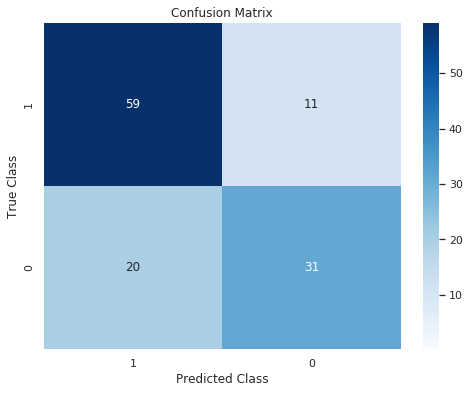

In [0]:
#Print Confusion Matrix
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_curve, roc_auc_score

plt.figure()
cm = confusion_matrix(test_labels, y_pred)
labels = ['1', '0']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

#### Precision , Recall and F1 score

In [0]:
y_prob = pd.DataFrame(y_prob)

In [0]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(test_labels, y_prob)

In [0]:
# calculate AUC
auc = roc_auc_score(test_labels, y_prob)
print('AUC: %.3f' % auc)

AUC: 0.829


In [0]:
print("Recall: {0}".format(round(recall_score(test_labels, y_pred),4)))

Recall: 0.6471


In [0]:
print("Precision: {0}".format(round(precision_score(test_labels, y_pred),4)))

Precision: 0.75


In [0]:
# calculate F1 score
f1_score(test_labels, y_pred)

0.6947368421052633